In [9]:
# Computation libraries
import numpy as np
import matplotlib.pyplot as plt

# Import non linear dataset
from nnfs.datasets import spiral_data
from seaborn import set_style
set_style('white')

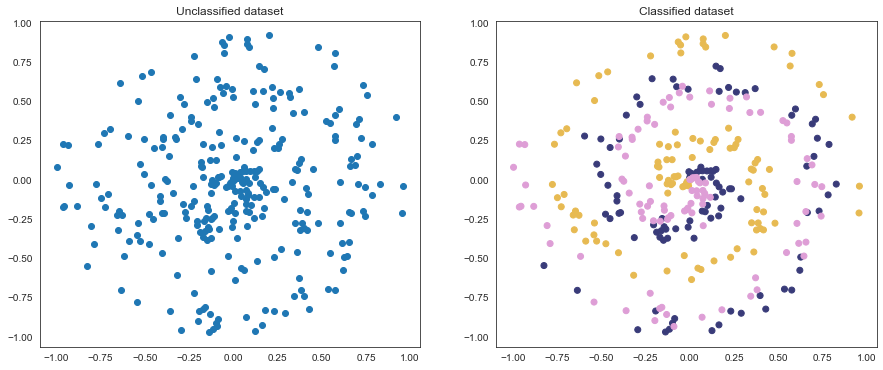

In [10]:
# Hard classification problem for linear models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Generate dataset
X, y = spiral_data(samples=100, classes=3)

# Scatter plots
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap="tab20b")

# Plot stuff
axes[0].set(title='Unclassified dataset')
axes[1].set(title='Classified dataset')

plt.show()

In [11]:
# Import deeplib
from deeplib.layer import Dense
from deeplib.activation import ReLU
from deeplib.active_loss import Softmax_CategoricalCrossEntropy
from deeplib.optimizer import SGD

Architect model

In [12]:
# Create NN architecture
dense1 = Dense(2, 64)
activation1 = ReLU()
dense2 = Dense(64, 3)
activation_loss = Softmax_CategoricalCrossEntropy()
optimizer = SGD()

FORWARD PASS

In [13]:
# Define forward pass
def forward(X, y):
    # Input -> DENSE 1 -> Activation 1 -> Dense 2 -> Activation_Loss
    dense1.forward(X)

    # Input -> Dense 1 -> ACTIVATION 1 -> Dense 2 -> Activation_Loss
    activation1.forward(dense1.output)

    # Input -> Dense 1 -> Activation 1 -> DENSE 2 -> Activation_Loss
    dense2.forward(activation1.output)

    # Input -> Dense 1 -> Activation 1 -> Dense 2 -> ACTIVATION_LOSS
    return activation_loss.forward(dense2.output, y)
        

In [14]:
# Define accuracy
def accuracy(y):
    # Get predictions from layer
    predictions = np.argmax(activation_loss.output, axis=1)

    # Transform to one dimension if needed
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)

    # Compute accuracy
    return np.mean(predictions == y)

BACKPROPAGRATION

In [15]:
# Define backward
def backward(y):
    # ACTIVATION_LOSS -> Dense 2 -> Activation 1 -> Dense 2 -> Activation_Loss
    activation_loss.backward(activation_loss.output, y)

    # Activation_Loss -> DENSE 2 -> Activation 1 -> Dense 2 -> Activation_Loss
    dense2.backward(activation_loss.dinputs)

    # Activation_Loss -> DENSE 2 -> ACTIVATION 1 -> Dense 1 -> Inputs
    activation1.backward(dense2.dinputs)

    # Activation_Loss -> DENSE 2 -> Activation 1 -> DENSE 1 -> Optimize
    dense1.backward(activation1.dinputs)

    # Activation_Loss -> DENSE 2 -> Activation 1 -> DENSE 1 -> OPTIMIZE
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

In [16]:
# Get dataset
X, y = spiral_data(samples=100, classes=3)

# Train model
for epoch in range(10001):

    # Forward pass
    loss = forward(X, y)

    # Compute accuracy
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Accuracy: {accuracy(y):.3f} | Loss: {loss:.3f}")

    # Backpropagate
    backward(y)

Epoch: 0 | Accuracy: 0.323 | Loss: 1.099
Epoch: 1000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 2000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 3000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 4000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 5000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 6000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 7000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 8000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 9000 | Accuracy: 0.333 | Loss: 1.099
Epoch: 10000 | Accuracy: 0.333 | Loss: 1.099
